<a href="https://colab.research.google.com/github/TolaniSilas/Loan-Eligibility-Project/blob/main/loaneligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

print("All libraries and modules have been imported!")

All libraries and modules have been imported!


**Problem Statement**:
**Dream Housing Finance** company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to **identify** the **customer's segments**, those who are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [ ]:
# Load the training loan eligibility dataset.
loan_data = pd.read_csv("/content/drive/MyDrive/Datasets/loan_eligibility_data/loan-train.csv")

# Display the first 10 rows of the dataframe.
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
# Print the size of the training dataset.
print(f"The number of entries in the training dataset is {loan_data.size}.")

# Print the shape of the training dataset.
print(f"The dimensions of the training dataset are {loan_data.shape}.")

The number of entries in the training dataset is 7982.
The dimensions of the training dataset are (614, 13).


The **training dataset** consists of **614 rows** and **13 columns**.

The columns include Loan_ID, Gender, Marital status, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, and Loan_Status.

In [ ]:
# Print a summary of values and data types in the loan data DataFrame.
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Checking if the Loan_ID column has all unique entries.
all_unique_loanID = loan_data["Loan_ID"].unique()
print(len(all_unique_loanID))  # The Loan_ID column consists of all unique entries.

614


In [ ]:
# Drop the Loan_ID column as it is not relevant for our analysis.
loan_df = loan_data.drop("Loan_ID", axis=1)
loan_df.head()

In [ ]:
# Get the features and corresponding labels from the dataset.
features = loan_df.drop("Loan_Status", axis=1)  # Extracting features: We have 11 features in this loan dataset.
labels = loan_df.Loan_Status  # Extracting labels: These are the corresponding labels for the features.

# Separate numerical and categorical features.
num_features = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]  # Numerical features
cat_features = [col for col in features.columns if col not in num_features]  # Categorical features

**Explore the Numerical Columns.**

<Axes: >

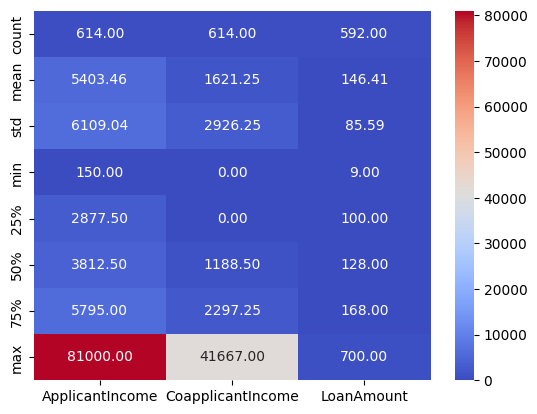

In [ ]:
# Get the summary statistics of the numerical columns.
summary_stats = loan_df[num_features].describe()
sns.heatmap(data=summary_stats, annot=True, fmt=".2f", cmap="coolwarm")

- The mean is relatively **larger** than the median across all columns, which is due to the influence or effects of heavily large values in the column, indicating a positively skewed distribution.

<Axes: >

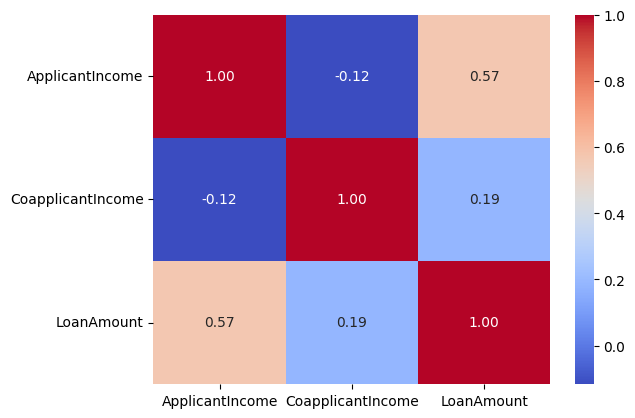

In [ ]:
# Perform correlation analysis on the numerical columns.
corr_data = loan_df[num_features].corr()
sns.heatmap(data=corr_data, annot=True, fmt=".2f", cmap="coolwarm")

- There's a **postive moderate relationship** between the Applicant Income and Loan Amount, which means that the higher the income of a loan applicant, there's tendency that they can request for a higher loan amount.

## Check the relationship of the numerical columns using scatterplots

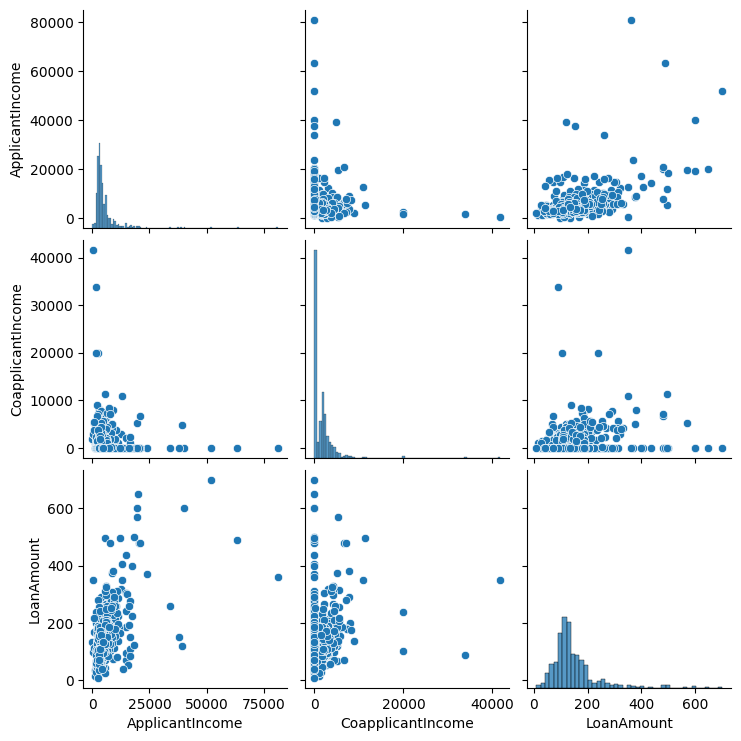

In [ ]:
sns.pairplot(data=loan_df, vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], kind="scatter")

- The scatterplot also confirm the positive moderate relationship between the Applicant Income and Loan Amount.

In [ ]:
def show_distribution(df, col):
    """This function states the summary statistics and also show the distribution of the numerical dataset."""

     # Get the summary statistics.
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode()[0]
    min_val = df[col].min()
    max_val = df[col].max()


    # Create a figure.
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))

    # Print out the summary statistics.
    print(f"The summary statistics for '{col}' column is: \n"
          f"Minimum: {min_val:.2f}\n"
          f"Mean: {mean_val:.2f}\n"
          f"Median: {median_val:.2f}\n"
          f"Mode: {mode_val:.2f}\n"
          f"Maximum: {max_val:.2f}\n")

    sns.set(style="darkgrid")

    # Plot the Histogram.
    sns.histplot(df[col], bins=20, ax=ax[0], kde=True)
    ax[0].set_ylabel("Frequency")

    # Add line colors for the min, mean, median, mode and max value.
    ax[0].axvline(x = min_val, color='cyan', linewidth=2, linestyle='--')
    ax[0].axvline(x = mean_val, color='red', linewidth=2, linestyle='--')
    ax[0].axvline(x = median_val, color='yellow', linewidth=2, linestyle='--')
    ax[0].axvline(x = mode_val, color='gray', linewidth=2, linestyle='--')
    ax[0].axvline(x = max_val, color='cyan', linewidth=2, linestyle='--')


    # Plot the Boxplot.
    sns.boxplot(df[col], ax=ax[1])
    ax[1].set_xlabel(f"{col} Value")

    fig.suptitle(f"{col} Distribution", fontsize=14, fontweight='bold', color='blue')
    fig.show()


The summary statistics for 'ApplicantIncome' column is: 
Minimum: 150.00
Mean: 5403.46
Median: 3812.50
Mode: 2500.00
Maximum: 81000.00

The summary statistics for 'CoapplicantIncome' column is: 
Minimum: 0.00
Mean: 1621.25
Median: 1188.50
Mode: 0.00
Maximum: 41667.00

The summary statistics for 'LoanAmount' column is: 
Minimum: 9.00
Mean: 146.41
Median: 128.00
Mode: 120.00
Maximum: 700.00



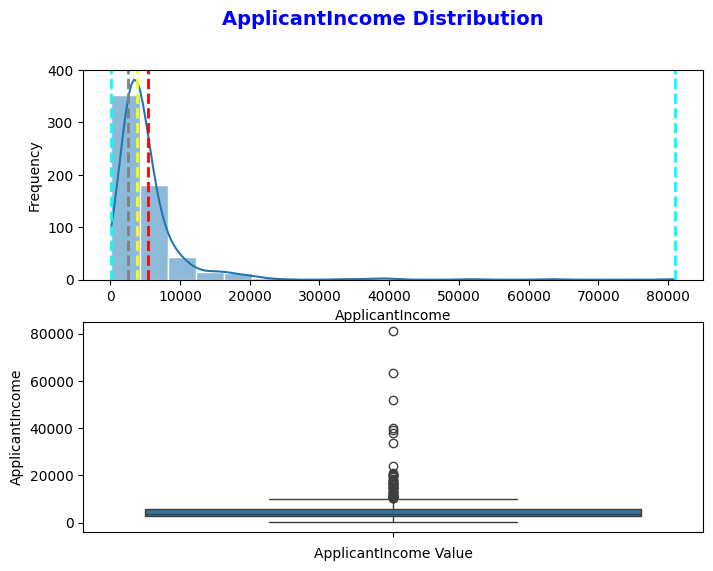

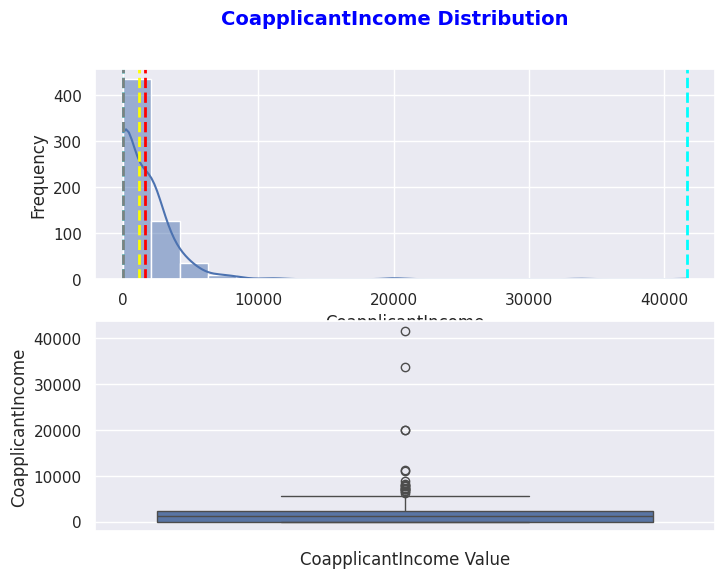

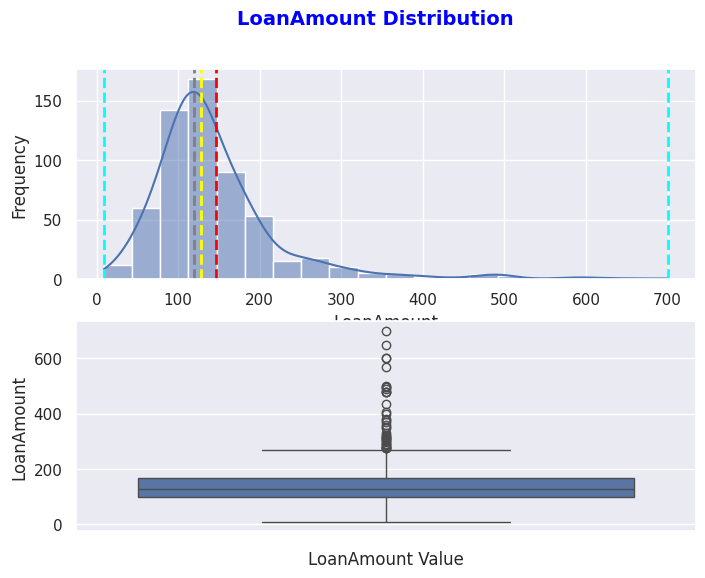

In [ ]:
for column in num_features:
    show_distribution(df=loan_df, col=column)

- From the histogram plot, it is evident that the distribution of the columns 'ApplicantIncome,' 'CoapplicantIncome,' and 'LoanAmount' is skewed to the right, with their means exceeding both the medians and modes. The box plot also confirms the presence of outliers in the dataset, with the 'ApplicantIncome' column having the highest number of outliers. Utilizing the Interquartile Range (IQR) as the outlier detection method is preferred, as it is more robust to skewed distributions.

- The skewness of each column is positively skewed, with each skewness value greater than zero (>0). The tails of each column's distribution are extremely heavy, indicating a large number of extreme values or outliers relative to a normal distribution. High observation values, as extreme values, can disproportionately influence summary statistics.

- The data identified as outliers by the interquartile range method may be considered valid because applicants or coapplicants might have higher incomes due to their jobs or self-employment. In some cases, the coapplicant's income may significantly exceed the applicant's income, reflecting differing earning capacities within the household. Therefore, these outliers might represent genuine financial situations rather than errors in the data.

- The loan amounts that can be lent to applicants can reach high values. While these values are not necessarily invalid data, they are considered **rare occurrences**.

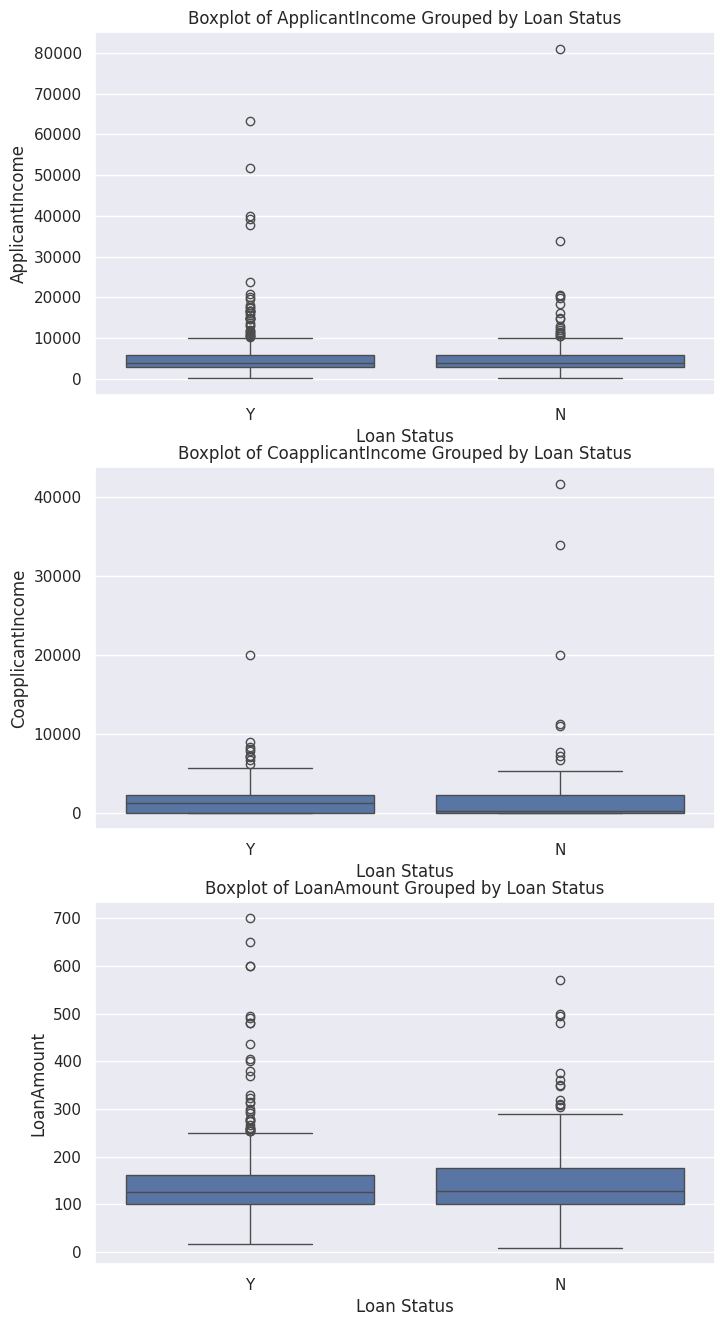

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(8, 16))

# Plot the box plot for each numerical column grouped by its Loan Status.
for i in range(np.array(num_features).shape[0]):
    sns.boxplot(data=loan_df, x="Loan_Status", y=num_features[i], ax=ax[i], orient='v')
    ax[i].set_title(f"Boxplot of {num_features[i]} Grouped by Loan Status")
    ax[i].set_xlabel("Loan Status")
    ax[i].set_ylabel(num_features[i])

**Explore the Categorical Columns.**

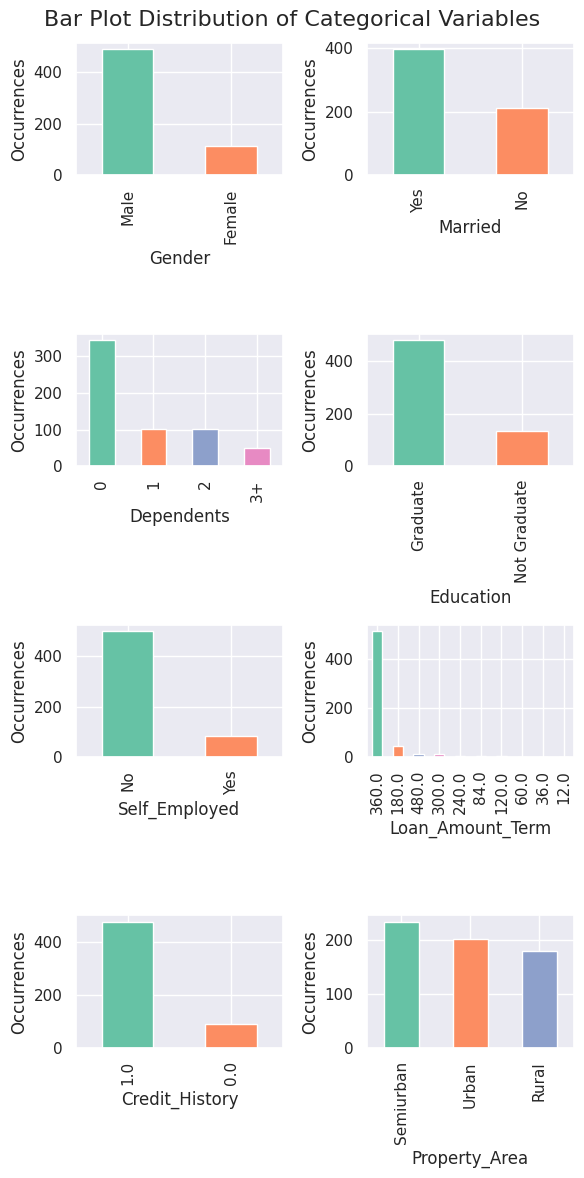

In [ ]:
rows, cols = np.array(cat_features).reshape(4, -1).shape

# Get the axes and create figure.
fig, ax = plt.subplots(rows, cols, figsize=(6, 12))

for i in range(rows):
    for j in range(cols):
        loan_df[cat_features[i*cols + j]].value_counts().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'], ax=ax[i, j])
        ax[i, j].set_xlabel(f"{cat_features[i*cols + j]}")
        ax[i, j].set_ylabel("Occurrences")

plt.suptitle('Bar Plot Distribution of Categorical Variables', fontsize=16)

plt.tight_layout()


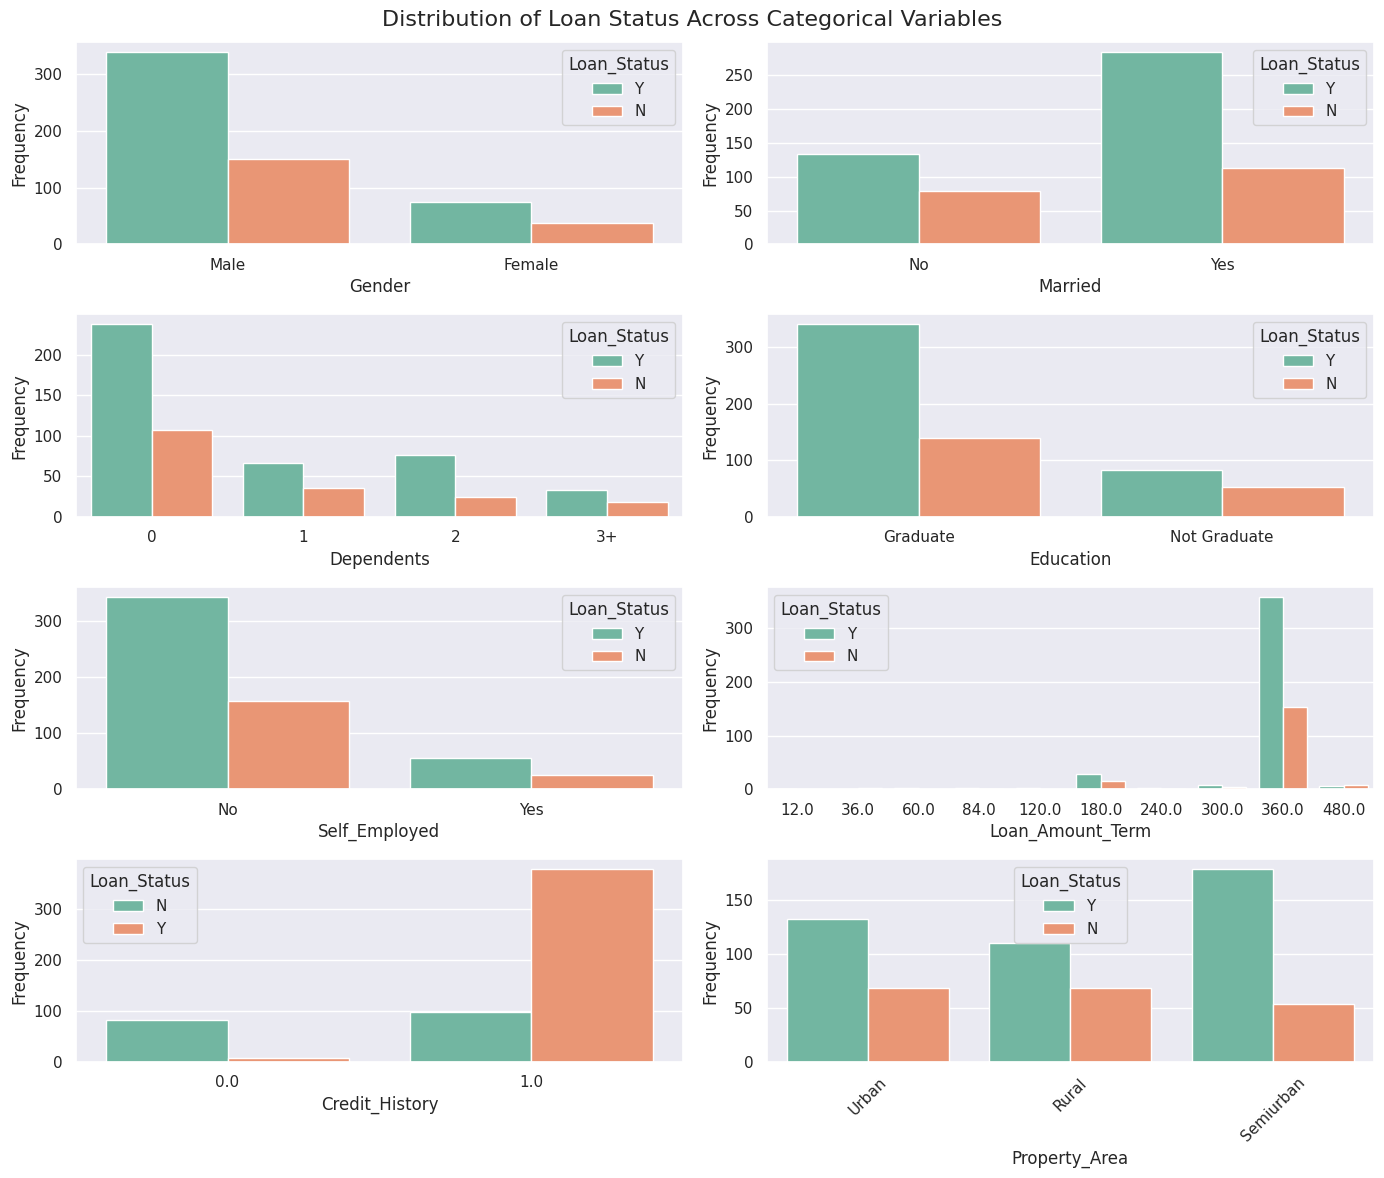

In [ ]:
# Get the axes and create figure.
fig, ax = plt.subplots(rows, cols, figsize=(14, 12))

for i in range(rows):
    for j in range(cols):

        sns.countplot(data=loan_df, x=cat_features[i*cols + j], hue='Loan_Status', ax=ax[i, j], palette=['#66c2a5', '#fc8d62'])
        ax[i, j].set_ylabel("Frequency")
        if cat_features[i*cols + j] == "Loan_Amount_Term":
            plt.xticks(rotation=45)


# Add title.
plt.suptitle("Distribution of Loan Status Across Categorical Variables", fontsize=16)

# Adjust layout.
plt.tight_layout()

From the plots above, several trends emerge:

- There is a higher approval rate for male applicants compared to female applicants, suggesting a potential gender bias in loan approval.

- Married individuals are more likely to have their loan applications approved compared to unmarried individuals, indicating potential stability in joint income sources.

- Applicants with no dependents have a higher likelihood of loan approval, possibly due to lower financial commitments and perceived lower risk.

- Graduates have a higher approval rate for loans, implying a correlation between higher education and financial stability.

- A positive credit history significantly increases the chances of loan approval, highlighting the importance of a good credit score in the lending process.

- Non-self-employed applicants are more likely to have their loan applications approved, possibly due to perceived job stability and regular income.

- Long-term loan seekers, particularly those opting for 30-year terms, have a higher approval rate, suggesting a preference for extended repayment periods to manage monthly cash flows effectively.

- Applicants residing in semi-urban areas have a higher likelihood of loan approval compared to those in urban or rural areas, possibly due to factors such as lower competition for resources or stronger community ties.

Text(0, 0.5, '')

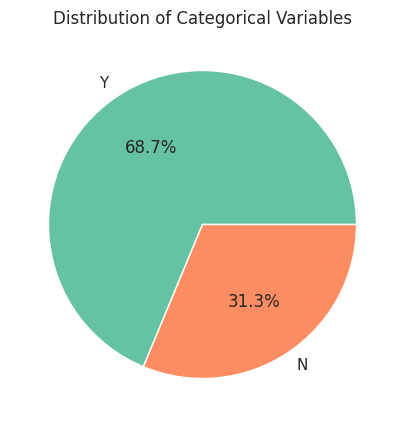

In [ ]:
plt.figure(figsize=(5, 5))
loan_df["Loan_Status"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title('Distribution of Categorical Variables')
plt.ylabel('')

- In the **Dream House** Loan Dataset, there's higher percentage of loan approval than non-approval of loans, signifying class imbalance between the class distribution.

## Data Validation & Cleaning

In [ ]:
duplicate_rows = loan_df[loan_df.duplicated(keep=False)]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows

Number of duplicate rows: 0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


The loan dataset is of no **duplicate values.**

In [ ]:
def detect_missing(col):
    """
    This function helps to detect missing values and also calculate the percentage of missing values in a column.
    """
    num_missing = col.isnull().sum()    # Get the number of missing values in a column.

    per_missing = (num_missing / len(col)) * 100  # Get the percentage (%) of missing values

    print(f"The number of missing values in the '{col.name}' column is {num_missing}.")
    print(f"The percentage of missing values is {round(per_missing, 2)}%.\n")

# Check for missing values.
for column in features.columns:
    detect_missing(col=loan_df[column])

The number of missing values in the 'Gender' column is 13.
The percentage of missing values is 2.12%.

The number of missing values in the 'Married' column is 3.
The percentage of missing values is 0.49%.

The number of missing values in the 'Dependents' column is 15.
The percentage of missing values is 2.44%.

The number of missing values in the 'Education' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Self_Employed' column is 32.
The percentage of missing values is 5.21%.

The number of missing values in the 'ApplicantIncome' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'CoapplicantIncome' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'LoanAmount' column is 22.
The percentage of missing values is 3.58%.

The number of missing values in the 'Loan_Amount_Term' column is 14.
The percentage of missing values is 2.28%.

The number of missing values in

In [ ]:
# Handle the missing values.
loan_df["Gender"] = loan_df["Gender"].fillna(loan_df["Gender"].mode()[0])
loan_df["Married"] = loan_df["Married"].fillna(loan_df["Married"].mode()[0])
loan_df["Dependents"] = loan_df["Dependents"].fillna(loan_df["Dependents"].mode()[0])
loan_df["Self_Employed"] = loan_df["Self_Employed"].fillna(loan_df["Self_Employed"].mode()[0])
loan_df["LoanAmount"] = loan_df["LoanAmount"].fillna(loan_df["LoanAmount"].median())
loan_df["Loan_Amount_Term"] = loan_df["Loan_Amount_Term"].fillna(loan_df["Loan_Amount_Term"].mode()[0])
loan_df["Credit_History"] = loan_df["Credit_History"].fillna(loan_df["Credit_History"].mode()[0])

In [ ]:
# Check for missing values.
for column in features.columns:
    detect_missing(col=loan_df[column])

The number of missing values in the 'Gender' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Married' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Dependents' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Education' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Self_Employed' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'ApplicantIncome' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'CoapplicantIncome' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'LoanAmount' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Loan_Amount_Term' column is 0.
The percentage of missing values is 0.0%.

The number of missing values in the 'Credi

# Convert data types for better analysis and consistency

In [ ]:
# Remove the '+' sign from the 'Dependents' column and ensure it's in the correct format (string).
loan_df["Dependents"] = loan_df.Dependents.str.replace("+", "")

# Convert 'Loan_Amount_Term' from months to years by dividing by 12 and cast to integer.
loan_df["Loan_Tenure"] = (loan_df["Loan_Amount_Term"] / 12).astype("int")

# Drop the Loan_Amount_Term column.
loan_df = loan_df.drop("Loan_Amount_Term", axis=1)

# Convert 'Credit_History' to integer type for consistent data representation.
loan_df["Credit_History"] = loan_df["Credit_History"].astype("int")

# Convert 'ApplicantIncome' to float for more precise calculations.
loan_df["ApplicantIncome"] = loan_df["ApplicantIncome"].astype("float")

In [ ]:
# Display the DataFrame's summary including data types and non-null counts
# to verify that data types have been correctly converted and to check for any missing values.
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Credit_History     614 non-null    int64  
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  Loan_Tenure        614 non-null    int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


<Axes: >

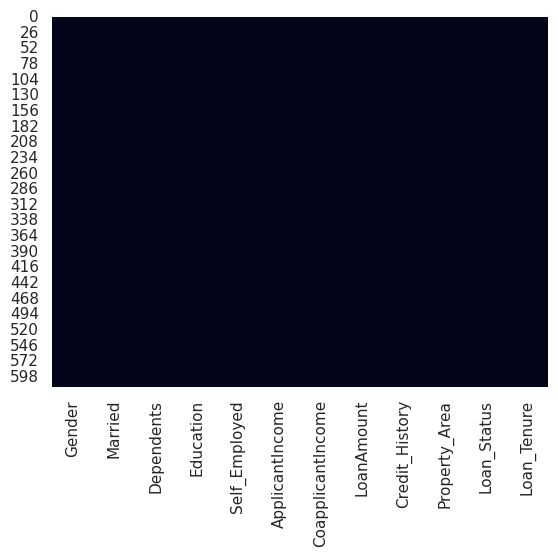

In [ ]:
sns.heatmap(data=loan_df.isnull(), cbar=False)

**Now, we have a cleaned dataset**.

In [ ]:
# Save the cleaned dataset.
loan_df.to_csv("/content/drive/MyDrive/Datasets/loan_eligibility_data/cleanedloandataset.csv", index=False)

In [ ]:
loan_df = pd.read_csv("/content/drive/MyDrive/Datasets/loan_eligibility_data/cleanedloandataset.csv")

In [ ]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,Loan_Tenure
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,1,Urban,Y,30
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,1,Rural,N,30
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,1,Urban,Y,30
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,1,Urban,Y,30
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,1,Urban,Y,30


In [ ]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
imputer = KNNImputer(n_neighbors=2)
array = imputer.fit_transform(X)
print(X)
print()
print(array)

[[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]

[[1.  2.  4. ]
 [3.  4.  3. ]
 [5.5 6.  5. ]
 [8.  8.  7. ]]


## **Preprocess the Data.**

In [ ]:
# Get the features and corresponding labels from the dataset.
features = loan_df.drop("Loan_Status", axis=1)   # Extracting features: We have 11 features in this loan dataset.
labels = loan_df[["Loan_Status"]]

In [ ]:
features.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Tenure
0,Male,No,0,Graduate,No,5849.0,0.0,128.0,1,Urban,30
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,1,Rural,30
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,1,Urban,30
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,1,Urban,30
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,1,Urban,30


In [ ]:
# Define the columns to be encoded.
columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Credit_History", "Property_Area"]

features = pd.get_dummies(features, columns=columns, prefix=columns, dtype=float)

features.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Tenure,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,128.0,30,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,30,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3000.0,0.0,66.0,30,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.0,30,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,30,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Split the Data into training & testing sets.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size=0.2, stratify=labels, shuffle=True)

## **FEATURE ENGINEERING**

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Define the random forest model and fit to the training data
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42, class_weight="balanced", max_depth=5)

random_forest.fit(X_train, y_train)

# Define the feature selection object.
select_from_model = SelectFromModel(random_forest, prefit=True)

# Transform the training features.
X_train_transform = select_from_model.transform(X_train)
print(X_train_transform.shape)

original_features = features.columns
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel.
features_bool = select_from_model.get_support()

selected_features = original_features[features_bool]
print(f"Selected features: {selected_features}")


(491, 5)
Original features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Tenure',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Credit_History_0', 'Credit_History_1',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')
Selected features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Credit_History_0', 'Credit_History_1'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Feature Importance')

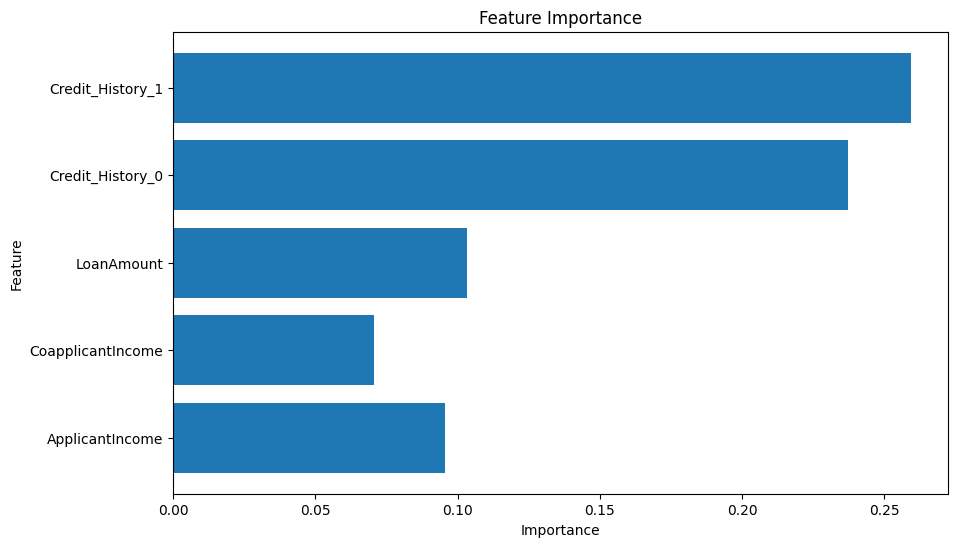

In [ ]:
feature_importance = pd.DataFrame({"feature": selected_features, "importance": random_forest.feature_importances_[features_bool]})

# Create a figure.
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")


## **Scale the features.**

In [ ]:
X_train = X_train[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Credit_History_0", "Credit_History_1"]]

X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_0,Credit_History_1
154,3254.0,0.0,50.0,0.0,1.0
239,3315.0,0.0,96.0,0.0,1.0
448,3340.0,1710.0,150.0,1.0,0.0
471,2653.0,1500.0,113.0,1.0,0.0
273,2620.0,2223.0,150.0,0.0,1.0


In [ ]:
X_train.isna().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Credit_History_0,0
Credit_History_1,0


In [ ]:
# Separate numerical columns from categorical columns
numerical_columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
categorical_columns = ["Credit_History_0", "Credit_History_1"]

scaler = MinMaxScaler()

# Fit and transform the numerical columns
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_columns])

# Convert the scaled data back to a DataFrame
X_train_scaled_numerical = pd.DataFrame(X_train_scaled_numerical, columns=numerical_columns, index=X_train.index)

# Combine the scaled numerical columns with the original categorical columns
X_train_scaled = pd.concat([X_train_scaled_numerical, X_train[categorical_columns]], axis=1)

X_train_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_0,Credit_History_1
154,0.037678,0.000000,0.059334,0.0,1.0
239,0.038433,0.000000,0.125904,0.0,1.0
448,0.038742,0.041040,0.204052,1.0,0.0
471,0.030239,0.036000,0.150507,1.0,0.0
273,0.029830,0.053352,0.204052,0.0,1.0


In [ ]:
# Fit and transform the numerical columns
X_test_scaled_numerical = scaler.transform(X_test[numerical_columns])

# Convert the scaled data back to a DataFrame
X_test_scaled_numerical = pd.DataFrame(X_test_scaled_numerical, columns=numerical_columns, index=X_test.index)

# Combine the scaled numerical columns with the original categorical columns
X_test_scaled = pd.concat([X_test_scaled_numerical, X_test[categorical_columns]], axis=1)

X_test_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History_0,Credit_History_1
150,0.075096,0.000000,0.157742,1.0,0.0
559,0.049140,0.055344,0.250362,0.0,1.0
598,0.120720,0.000000,0.247467,0.0,1.0
235,0.065478,0.030240,0.232996,0.0,1.0
145,0.026241,0.107663,0.131693,0.0,1.0


## **MODEL BUILDING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



def train_and_evaluate_model(model, model_type, X_train_scaled=X_train_scaled, y_train=y_train, X_test_scaled=X_test_scaled, y_test=y_test):

    model.fit(X_train_scaled, y_train)

    train_pred = model.predict(X_train_scaled)

    train_proba = model.predict_proba(X_train_scaled)

    # Create a figure and a 1x2 grid of subplots
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))



    # Get evaluation metrics
    conf_matrix = confusion_matrix(y_train, train_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt=".0f", ax=ax[0])

    # Add title and axis labels
    ax[0].set_title(f'{model_type} Training Confusion Matrix')
    ax[0].set_xlabel('Predicted Label')
    ax[0].set_ylabel('Actual Label')

    # Get classification report.
    class_report = classification_report(y_train, train_pred)
    print(f"Training Classification Report for {model_type} Model:\n", class_report, "\n")

    # Calculate the AUC score.
    auc = roc_auc_score(y_train, train_proba[:, 1])
    print(f"Training AUC for {model_type} Model: {auc}")



    test_pred = model.predict(X_test_scaled)

    test_proba = model.predict_proba(X_test_scaled)

    # Get evaluation metrics
    conf_matrix = confusion_matrix(y_test, test_pred)
    sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt=".0f", ax=ax[1])

    # Add title and axis labels
    ax[1].set_title(f'{model_type} Testing Confusion Matrix')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('Actual Label')

    # Get classification report.
    class_report = classification_report(y_test, test_pred)
    print(f"\nTesting Classification Report for {model_type} Model:\n", class_report, "\n")

    # Calculate the AUC score.
    auc = roc_auc_score(y_test, test_proba[:, 1])
    print(f"Testing AUC for {model_type} Model: {auc}\n")

    plt.tight_layout()



Training Classification Report for SVC Model:
               precision    recall  f1-score   support

           0       0.91      0.40      0.56       154
           1       0.78      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.69      0.71       491
weighted avg       0.82      0.80      0.77       491
 

Training AUC for SVC Model: 0.7309722918031523

Testing Classification Report for SVC Model:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 

Testing AUC for SVC Model: 0.7761609907120745

Training Classification Report for KNN Model:
               precision    recall  f1-score   support

           0       0.81      0.54      0.65       15

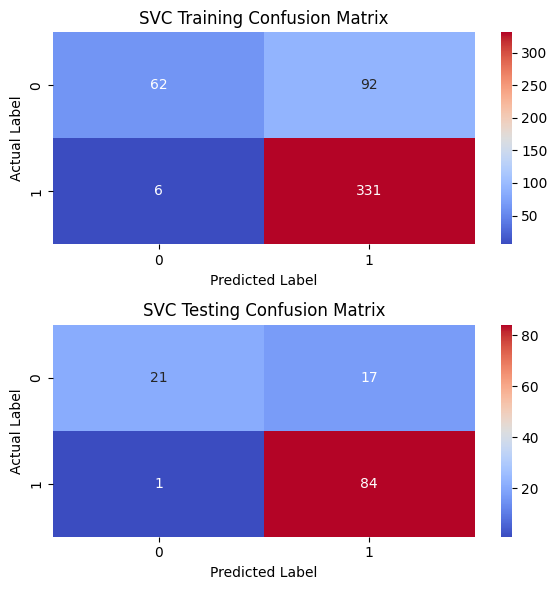

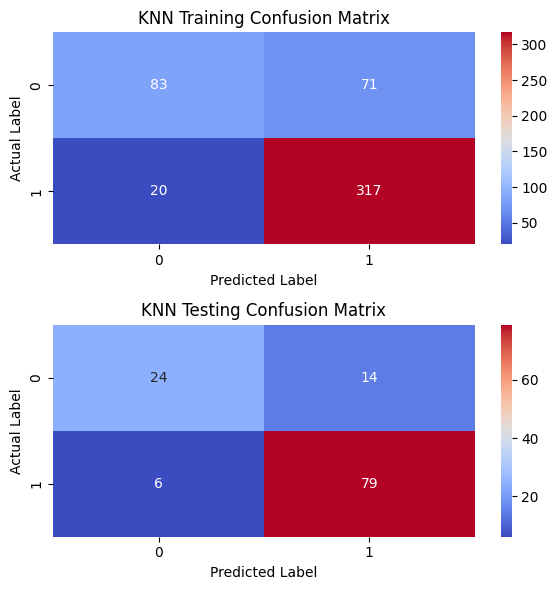

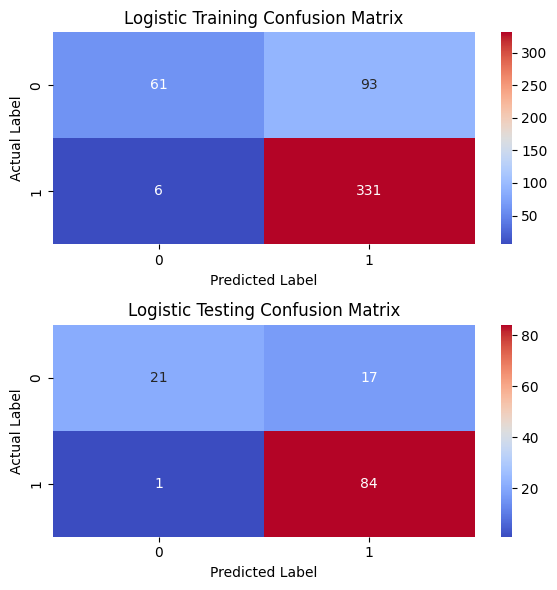

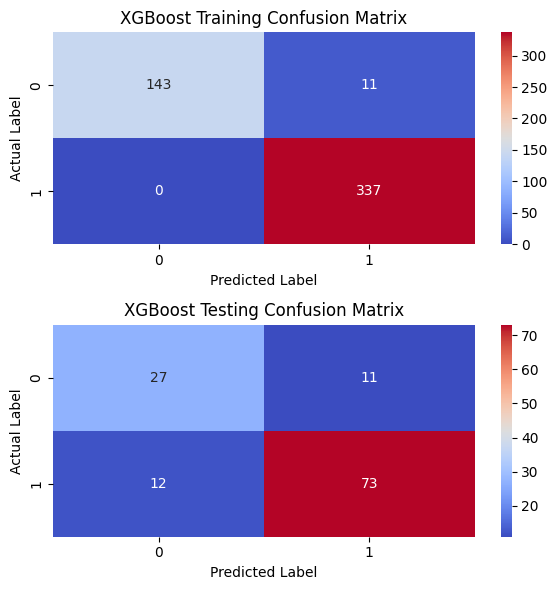

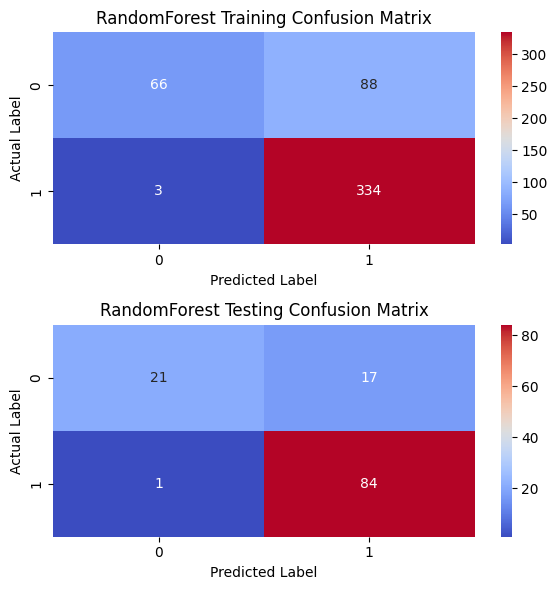

In [ ]:
import xgboost as xgb


svc = SVC(random_state=42, probability=True, kernel="rbf")
neighbors = KNeighborsClassifier(weights="uniform")
logistic = LogisticRegression(random_state=42)
# Initialize the XGBClassifier with parameters
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    max_depth=5,
)
rf_model = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=5)



model_dict = {"1": [svc, "SVC"],
              "2": [neighbors, "KNN"],
              "3": [logistic, "Logistic"],
              "4": [xgb_model, "XGBoost"],
              "5": [rf_model, "RandomForest"],
              }


for key, value in model_dict.items():
    model = value[0]
    model_type = value[1]
    train_and_evaluate_model(model=model, model_type=model_type)

## **Evaluate the model.**

The random forest and gradient boosting models exhibit similarly high recall and precision predictive power. When evaluating the AUC score, the random forest's AUC score is slightly higher than that of the gradient boosting model. Consequently, the random forest model is chosen; let's hypertune the hyperparameters for optimal model performance.

## **HYPERPARAMETER TUNING**

In [ ]:
# Initialize the XGBClassifier.
xgb_model = xgb.XGBClassifier(
    random_state=42,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=-1,
    # eval_metric='precision',
)

print(xgb_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 7],
    'learning_rate': [0.0001, 0.001, 0.01],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0.001, 0.01, 0.1],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring="precision", error_score='raise')

# Fit GridSearchCV to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate on the test set
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0.001, 'learning_rate': 0.01, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.7834130848054899


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:55:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Training Classification Report for Model:
               precision    recall  f1-score   support

           0       0.93      0.69      0.80       154
           1       0.88      0.98      0.92       337

    accuracy                           0.89       491
   macro avg       0.90      0.84      0.86       491
weighted avg       0.89      0.89      0.88       491
 

Training AUC for Model: 0.9747389109406914


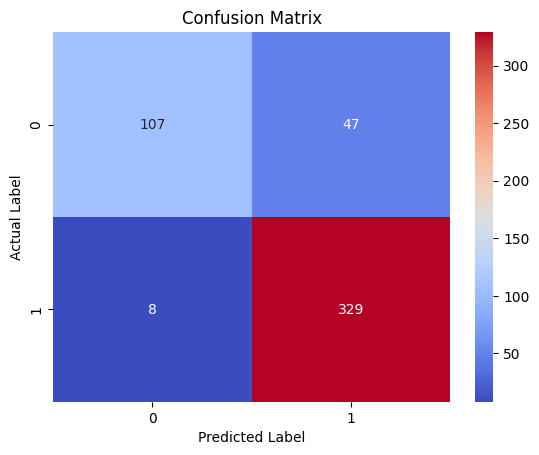

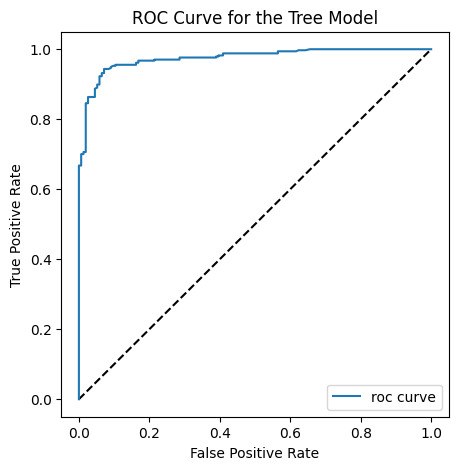

In [ ]:
# Make Predictions with the decision tree classifier model using the validation data.
predictions = best_model.predict(X_train_scaled)

y_proba = best_model.predict_proba(X_train_scaled)

# Get evaluation metrics
conf_matrix = confusion_matrix(y_train, predictions)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt=".0f")

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Get classification report.
class_report = classification_report(y_train, predictions)
print("Training Classification Report for Model:\n", class_report, "\n")

# Calculate the AUC score.
auc = roc_auc_score(y_train, y_proba[:, 1])
print(f"Training AUC for Model: {auc}")

# Calculate ROC curve.
fpr, tpr, threshold = roc_curve(y_train, y_proba[:, 1])

# PLot the ROC curve.
fig = plt.figure(figsize=(5, 5))
# Plot the diagonal line.
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="roc curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the Tree Model")
plt.legend(loc="lower right")

Testing Classification Report for Model:
               precision    recall  f1-score   support

           0       0.82      0.61      0.70        38
           1       0.84      0.94      0.89        85

    accuracy                           0.84       123
   macro avg       0.83      0.77      0.79       123
weighted avg       0.84      0.84      0.83       123
 

Testing AUC for Model: 0.8165634674922602


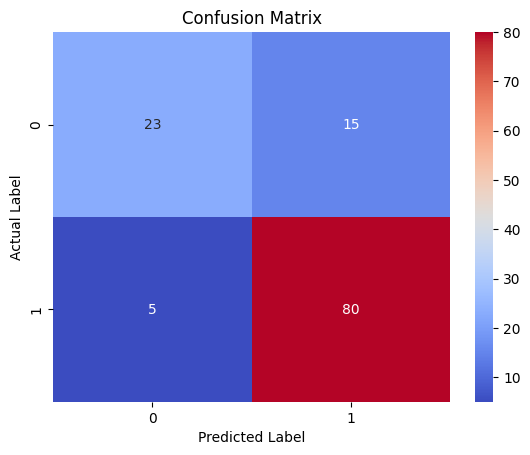

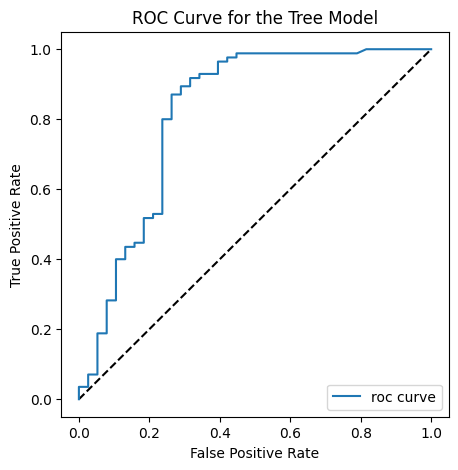

In [ ]:
# Make Predictions with the decision tree classifier model using the validation data.
predictions = best_model.predict(X_test_scaled)

y_proba = best_model.predict_proba(X_test_scaled)

# Get evaluation metrics
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt=".0f")

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Get classification report.
class_report = classification_report(y_test, predictions)
print("Testing Classification Report for Model:\n", class_report, "\n")

# Calculate the AUC score.
auc = roc_auc_score(y_test, y_proba[:, 1])
print(f"Testing AUC for Model: {auc}")

# Calculate ROC curve.
fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

# PLot the ROC curve.
fig = plt.figure(figsize=(5, 5))
# Plot the diagonal line.
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="roc curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the Tree Model")
plt.legend(loc="lower right")

In the problem statement provided above, both **recall** and **precision** are important.
The company wants a model with **high recall** so as to identify all customers who are eligible for a loan. Missing out on eligible customers (false negatives) could result in **lost businesses opportunities**. Therefore, high recall ensures that the company target all **potential eligible customers**.

The company also wants a model with **high precision** because the company wants to avoid incorrectly classifying customers as eligible when they are not (false positives). Approving loans for ineligible customers could result in financial losses for the company.Therefore, high precision ensures that the company target only those customers who are **truly eligible**.


## **Save the Model**

In [ ]:
import joblib
print(joblib.__version__)

# Specify the path where you want to save the model
model_path = '/content/drive/MyDrive/Datasets/loan_model.pkl'

# Save the model
joblib.dump(model, model_path)

print(f"Model saved to {model_path}")

1.4.2
Model saved to /content/drive/MyDrive/Datasets/loan_model.pkl


## **Use the model to make inferences.**

In [ ]:
# Load the model
loaded_model = joblib.load(model_path)
print("Model loaded successfully.")

Model loaded successfully.


Testing Classification Report for Model:
               precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123
 

Testing AUC for Model: 0.7835913312693499


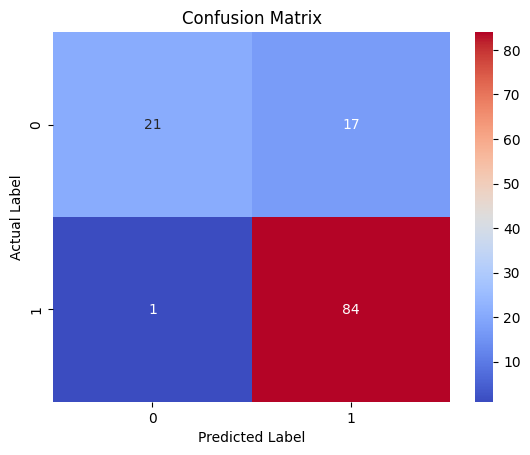

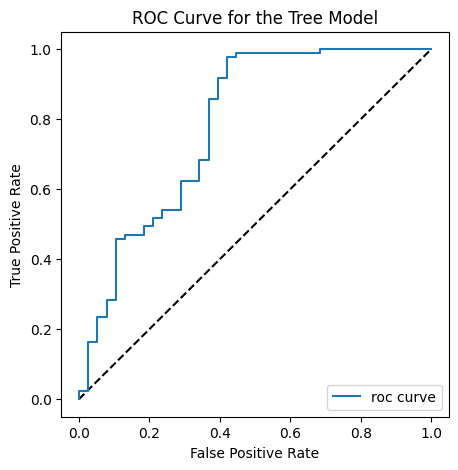

In [ ]:
# Make Predictions with the decision tree classifier model using the validation data.
predictions = loaded_model.predict(X_test_scaled)

y_proba = loaded_model.predict_proba(X_test_scaled)

# Get evaluation metrics
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt=".0f")

# Add title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

# Get classification report.
class_report = classification_report(y_test, predictions)
print("Testing Classification Report for Model:\n", class_report, "\n")

# Calculate the AUC score.
auc = roc_auc_score(y_test, y_proba[:, 1])
print(f"Testing AUC for Model: {auc}")

# Calculate ROC curve.
fpr, tpr, threshold = roc_curve(y_test, y_proba[:, 1])

# PLot the ROC curve.
fig = plt.figure(figsize=(5, 5))
# Plot the diagonal line.
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="roc curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for the Tree Model")
plt.legend(loc="lower right")